In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

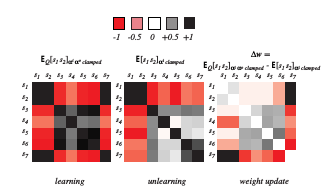

Fig.9: Boltzmann learning of a single pattern is illustrated for the seven-node network of Fig.8. The (symmetric) matrix on the left shows the correlation of units for the learning component, where the input units are clamped to s1 = +1, s2 = +1, and the outputs to s6 = −1, s7 = +1. The middle matrix shows the unlearning component, where the inputs are clamped but outputs are free to vary. The diﬀerence between those matrices is shown on the right, and is proportional to the weight update (Eq. 14). Notice, for instance, that because the correlation between s1 and s2 is large in both the learning and unlearning components (because those variables are clamped), there is no associated weight change, i.e., ∆w12 = 0. However, strong correlations between s1 and s7 in the learning but not in the unlearning component implies that the weight w17 should be increased, as can be seen in the weight update matrix.


## Stochastic Boltzmann Learning

### Visible States Learning

Before diving into the central concern of learning categories from training patterns, consider an alternative learning problem. Here, we aim to match the desired probabilities for all visible units, denoted as $ Q(\alpha) $ (derived from a training set), with the actual probabilities $P(\alpha) $, achieved through random simulations. These probabilities describe network states annealed without clamping input or output variables.

The probability of a visible configuration is given by:

$$
P(\alpha) = \sum_{\beta} P(\alpha, \beta) = \frac{\sum_{\beta} e^{-E_{\alpha\beta} / T}}{Z}
$$

where $ E_{\alpha\beta} $ is the system energy for a configuration defined by visible $ \alpha $ and hidden $ \beta $ units, and $ Z $ is the partition function.

A natural measure of the difference between the actual and desired probability distributions is the Kullback-Leibler (KL) divergence:

$$
D_{KL}(Q(\alpha), P(\alpha)) = \sum_{\alpha} Q(\alpha) \log \frac{Q(\alpha)}{P(\alpha)}.
$$

Gradient descent in this relative entropy is used for learning:

$$
\Delta w_{ij} = -\eta \frac{\partial D_{KL}}{\partial w_{ij}} = \eta \sum_{\alpha} \frac{Q(\alpha)}{P(\alpha)} \frac{\partial P(\alpha)}{\partial w_{ij}},
$$

where \( \eta \) is the learning rate. Substituting and simplifying:

$$
\Delta w_{ij} = \frac{\eta}{T} \left[ \mathbb{E}_Q[s_i s_j]^{\text{clamped}} - \mathbb{E}[s_i s_j]^{\text{free}} \right],
$$

where \( \mathbb{E}_Q[s_i s_j]^{\text{clamped}} \) is the correlation when visible units are clamped, and \( \mathbb{E}[s_i s_j]^{\text{free}} \) is the correlation when units are free to vary. Learning adjusts weights until these two terms are equal.

### Learning Input-Output Associations

To learn mappings from input to output, the network adjusts weights to match \( P(\alpha_o | \alpha_i) \) to \( Q(\alpha_o | \alpha_i) \), minimizing the KL divergence weighted by input probabilities:

$$
\bar{D}_{KL} = \sum_{\alpha_i} P(\alpha_i) \sum_{\alpha_o} Q(\alpha_o | \alpha_i) \log \frac{Q(\alpha_o | \alpha_i)}{P(\alpha_o | \alpha_i)}.
$$

The weight update rule is:

$$
\Delta w_{ij} = \frac{\eta}{T} \left[ \mathbb{E}_Q[s_i s_j]^{\alpha_i \alpha_o \text{ clamped}} - \mathbb{E}[s_i s_j]^{\alpha_i \text{ clamped}} \right].
$$

### Example of Learning a Single Pattern

Fig.8 illustrates a seven-unit network trained on:
- Input pattern: $ s_1 = +1, s_2 = +1 $
- Output pattern: $ s_6 = -1, s_7 = +1 $.

Initially, the network energy corresponds to random weights. Training lowers the energy for states with the desired output, increasing the likelihood of achieving the correct output during annealing.

For example, considering units $ s_1 $ and $ s_7 $:
- During learning, both are clamped at $ +1 $, so $ \mathbb{E}_Q[s_1 s_7] = +1 $.
- During unlearning, $ s_7 $ is free to vary, leading to a reduced correlation.

Weight updates strengthen associations between inputs and outputs while minimally adjusting hidden unit weights.

### Training Multiple Patterns

During training, each pattern in the dataset is presented sequentially, updating weights as described. Learning continues until the actual output matches the desired output for all patterns.

### References
- Fig.8: Training dynamics with a seven-unit network.
- Fig.9: Detailed learning of a single pattern.

## Deterministic Boltzmann Learning and Initialization Parameters

##  Deterministic Boltzmann Learning

The computational complexity of **stochastic Boltzmann learning** is very high due to the repeated annealing and polling of all units. To address this, **deterministic Boltzmann learning** employs mean-field annealing with analog values for $ s_i $, leading to significant computational savings.

At the end of deterministic simulated annealing, $ s_i $ values converge to $\pm 1$, as required. The following algorithm outlines the deterministic Boltzmann learning process:

### Algorithm 3: Deterministic Boltzmann Learning

1. **Initialize**:
   - Training dataset $ D $ (containing feature and category information).
   - Learning rate $ \eta $.
   - Temperature schedule $ T(k) $.
   - Weight matrix $ w_{ij} $ for $ i, j = 1, \ldots, N $.

2. **Repeat** until $ k = k_{\text{max}} $ or a convergence criterion is met:
   - Randomly select a training pattern $ x $.
   - Randomize the states $ s_i $.
   - **Anneal the network** with input and output clamped:
     - At low $ T $, compute $ \langle s_i s_j \rangle_{\alpha_i \alpha_o \text{ clamped}} $.
   - Randomize $ s_i $ states again.
   - **Anneal the network** with input clamped but output free:
     - At low $ T $, compute $ \langle s_i s_j \rangle_{\alpha_i \text{ clamped}} $.
   - Update weights:
     $$
     w_{ij} \leftarrow w_{ij} + \frac{\eta}{T} \left( \langle s_i s_j \rangle_{\alpha_i \alpha_o \text{ clamped}} - \langle s_i s_j \rangle_{\alpha_i \text{ clamped}} \right)
     $$

3. **Return** updated weights $ w_{ij} $.

Using mean-field theory, the correlations $ \langle s_i s_j \rangle $ can be efficiently approximated as:
$$
\langle s_i s_j \rangle \approx \langle s_i \rangle \langle s_j \rangle \approx s_i s_j
$$

---

##  Initialization and Setting Parameters

As with most classifiers, **Boltzmann networks** require careful parameter initialization:

### Network Topology

- **Visible Units**: Determined by the dimensions of the binary feature vectors and number of categories.
- **Hidden Units**:
  - Fully interconnected networks (input, output, hidden) are the default assumption.
  - Alternate topology: Eliminate interconnections among input and output units for faster training. However, this reduces the network's ability for pattern completion or classifying patterns with missing features.

### Number of Hidden Units

- Depends on the classification problem's complexity.
- Upper bound:
  $$
  \text{Hidden units} \leq n
  $$
  where $ n $ is the number of distinct input-output pairs in the training set. Each pattern corresponds to a unique hidden unit with value $ s_i = +1 $, while all others are $ s_i = -1 $.

This setup ensures a unique internal representation for every pattern.

### Final Notes

- **Learning rate** $( \eta $) and **temperature schedule** $( T(k) $) are critical for achieving convergence.
- Increasing hidden units enables the network to store more patterns but complicates interpretation of hidden unit representations.

$$
\text{Weight update: } w_{ij} \propto \langle s_i s_j \rangle
$$
is essential for efficient training and accurate classification.


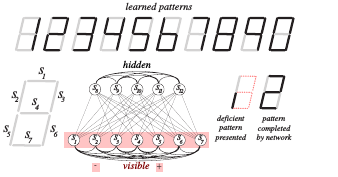

Fig.10: A Boltzmann network can be used for pattern completion, i.e., ﬁlling in unknown features of a deﬁcient pattern. Here, a twelve-unit network with ﬁve hidden units has been trained with the 10 numeral patterns of a seven-segment digital display. The diagram at the lower left shows the correspondence between the display segments and nodes of the network; a black segment is represented by a +1 and a light gray segment as a −1. Consider the deﬁcient pattern consisting of s2 = −1, s5 = +1. If these units are clamped and the full network annealed, the remaining ﬁve visible units will assume values most probable given the clamped ones, as shown at the right.

In [1]:
import numpy as np

# Define a Boltzmann Machine class
class BoltzmannMachine:
    def __init__(self, num_visible, num_hidden):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.num_units = num_visible + num_hidden

        # Initialize weights and biases
        self.weights = np.random.normal(0, 0.1, (self.num_units, self.num_units))
        np.fill_diagonal(self.weights, 0)  # No self-connections
        self.biases = np.zeros(self.num_units)

    def energy(self, state):
        """Compute the energy of a given state."""
        return -0.5 * np.dot(state, np.dot(self.weights, state)) - np.dot(self.biases, state)

    def update_weights(self, clamped_corr, free_corr, learning_rate, temperature):
        """Update weights using the deterministic Boltzmann learning rule."""
        delta_w = (clamped_corr - free_corr) * (learning_rate / temperature)
        self.weights += delta_w
        np.fill_diagonal(self.weights, 0)  # Ensure no self-connections

    def mean_field_update(self, state, temperature):
        """Perform a mean-field update to calculate the analog states."""
        for i in range(self.num_units):
            net_input = np.dot(self.weights[i], state) + self.biases[i]
            state[i] = np.tanh(net_input / temperature)  # Analog approximation
        return state

    def train(self, patterns, learning_rate=0.1, max_epochs=100, temperature=1.0):
        """Train the Boltzmann Machine using deterministic learning."""
        for epoch in range(max_epochs):
            for pattern in patterns:
                clamped_state = np.copy(pattern)

                # Clamped phase: calculate correlations
                self.mean_field_update(clamped_state, temperature)
                clamped_corr = np.outer(clamped_state, clamped_state)

                # Free phase: release output and calculate correlations
                free_state = np.random.uniform(-1, 1, self.num_units)
                self.mean_field_update(free_state, temperature)
                free_corr = np.outer(free_state, free_state)

                # Update weights
                self.update_weights(clamped_corr, free_corr, learning_rate, temperature)

    def pattern_completion(self, visible_units, max_iters=100, temperature=1.0):
        """Perform pattern completion to fill in missing features."""
        state = np.random.uniform(-1, 1, self.num_units)
        state[:self.num_visible] = visible_units

        for _ in range(max_iters):
            state = self.mean_field_update(state, temperature)
        
        return state[:self.num_visible]  # Return visible units

# Example: Training a Boltzmann Machine
num_visible = 7
num_hidden = 5
patterns = [
    np.array([+1, +1, -1, +1, -1, -1, +1, -1, +1, +1, -1, +1]),
    np.array([-1, +1, +1, -1, +1, -1, -1, +1, +1, -1, -1, +1])
]

# Initialize the Boltzmann Machine
bm = BoltzmannMachine(num_visible, num_hidden)

# Train the Boltzmann Machine
bm.train(patterns, learning_rate=0.05, max_epochs=50)

# Perform pattern completion
deficient_pattern = np.array([+1, +1, np.nan, +1, np.nan, -1, np.nan])
deficient_pattern[np.isnan(deficient_pattern)] = 0  # Replace missing with 0 for initial state
completed_pattern = bm.pattern_completion(deficient_pattern)

print("Completed Pattern:", completed_pattern)


Completed Pattern: [ 4.24663265e-61  3.97689445e-61  9.45552859e-62  1.47302110e-61
  3.17470811e-61 -1.62293835e-61 -1.47885076e-61]


### Boltzmann Learning Implementation


### Deterministic Boltzmann Learning: Parameters, Initialization, and Implementation

### Weight Initialization

For a particular hidden unit $i$, set $w_{ij}$ to be:
- Positive for each input unit $j$ corresponding to a $+1$ feature in its associated pattern.
- Negative for input units corresponding to a $-1$ feature.

For the remaining hidden units, invert the sign of the corresponding weights.

Connections between hidden units and output units:
- Positive for the known category.
- Negative for all other categories.

The internal representation is related to the probabilistic neural network implementation of Parzen windows. However, this approach results in an exponential growth in weights as the number of patterns increases, leading to slow training and poor generalization.

### Hidden Unit Count

1. **Upper Bound**:
   $n$, where $n$ is the number of training patterns.

2. **Lower Bound**:
   $\lceil \log_2 n \rceil$, required for distinct hidden configurations.

Practically, the number of hidden units depends on the classification problem's difficulty. To optimize:
- Start with a larger network and apply weight decay.

### Weight Decay

Add a small increment $\Delta w$ to $w_{ij}$:
- When $s_i$ and $s_j$ are both positive or both negative during the learning phase.
- Subtract during the unlearning phase.

Gradually decrease $\Delta w$ to reduce spurious correlations and eliminate unnecessary weights, improving generalization.

### Weight Initialization

1. Initialize roughly half of the weights as positive and the other half as negative.
2. Randomly assign weights within the range:
   $$
   -\frac{3}{N} < w_{ij} < \frac{3}{N},
   $$
   where $N$ is the total number of units.

### Annealing Schedule

Use $T(k+1) = cT(k)$ with $0.8 < c < 0.99$. For large iterations:
$$
T(k) = T(1) e^{-k/k_0},
$$
where $k_0$ is the decay constant.

#### Initial Temperature

Set the initial temperature $T(1)$ to ensure most candidate state transitions are accepted. To determine $T(1)$:

1. Let $m_1$ = number of energy-decreasing transitions.
2. Let $m_2$ = number of energy-increasing queries.
3. Let $E^+[\Delta E]$ = average energy increase.

The acceptance ratio is:
$$
R = \frac{m_1 + m_2 \cdot \exp(-E^+[\Delta E]/T(1))}{m_1 + m_2}.
$$

Rearranging:
$$
T(1) = \frac{E^+[\Delta E]}{\ln(m_2) - \ln(m_2 R - m_1(1 - R))}.
$$

Iterate until $m_1 + m_2 \approx m_0$ to determine $T(1)$.

### Learning Rate

The learning rate $\eta$ should satisfy:
$$
\eta \leq \frac{T^2}{N^2},
$$
where $T$ is the temperature and $N$ is the number of units.

### Stopping Criteria

1. **Annealing**:
   Stop when the temperature is low enough that no energetically unfavorable transitions are accepted.

2. **Training**:
   Monitor validation set error and stop when changes become negligible.

### Heuristic Speedup

- Propose simultaneous state changes for several nodes early in annealing.
- Store the current best configuration during annealing (pocket algorithm).


In [2]:
import numpy as np

def initialize_weights(num_visible, num_hidden):
    """
    Initialize weights for a fully connected Boltzmann Machine.
    Weights are randomly initialized within a small range.
    """
    limit = 3.0 / np.sqrt(num_visible + num_hidden)
    weights = np.random.uniform(-limit, limit, (num_visible + num_hidden, num_visible + num_hidden))
    np.fill_diagonal(weights, 0)  # No self-connections
    return weights

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def mean_field_update(weights, states, temperature):
    """
    Perform a mean-field update for the states.
    """
    net_input = np.dot(weights, states) / temperature
    return sigmoid(net_input)

def deterministic_boltzmann_learning(
    data, num_hidden, learning_rate=0.01, max_iterations=1000, initial_temp=5.0, final_temp=0.1, decay_factor=0.99
):
    """
    Train a Boltzmann network using deterministic Boltzmann learning.

    Parameters:
        data: numpy.ndarray
            Training data of shape (num_samples, num_features).
        num_hidden: int
            Number of hidden units.
        learning_rate: float
            Learning rate for weight updates.
        max_iterations: int
            Maximum number of iterations.
        initial_temp: float
            Initial temperature for annealing.
        final_temp: float
            Final temperature for annealing.
        decay_factor: float
            Decay factor for temperature.

    Returns:
        weights: numpy.ndarray
            Trained weights of the Boltzmann network.
    """
    num_visible = data.shape[1]
    num_units = num_visible + num_hidden

    # Initialize weights
    weights = initialize_weights(num_visible, num_hidden)

    # Training loop
    temperature = initial_temp
    for iteration in range(max_iterations):
        for sample in data:
            # Initialize states with visible units set to the sample data
            states = np.zeros(num_units)
            states[:num_visible] = sample

            # Phase 1: Clamp visible and hidden units
            for _ in range(10):  # Perform mean-field updates
                states = mean_field_update(weights, states, temperature)
            positive_phase = np.outer(states, states)

            # Phase 2: Clamp only visible units
            states = np.zeros(num_units)
            states[:num_visible] = sample
            for _ in range(10):
                states = mean_field_update(weights, states, temperature)
            negative_phase = np.outer(states, states)

            # Update weights
            weights += learning_rate / temperature * (positive_phase - negative_phase)

        # Annealing
        temperature = max(final_temp, temperature * decay_factor)

        # Monitoring progress (optional)
        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Temperature {temperature:.3f}")

    return weights

# Example Usage
if __name__ == "__main__":
    # Example binary training data (6 samples, 4 features)
    training_data = np.array([
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 1, 0, 0],
        [0, 0, 1, 1],
        [1, 0, 0, 1],
        [0, 1, 1, 0],
    ])

    num_hidden_units = 2
    trained_weights = deterministic_boltzmann_learning(training_data, num_hidden_units)

    print("Trained Weights:")
    print(trained_weights)


Iteration 0, Temperature 4.950
Iteration 100, Temperature 1.812
Iteration 200, Temperature 0.663
Iteration 300, Temperature 0.243
Iteration 400, Temperature 0.100
Iteration 500, Temperature 0.100
Iteration 600, Temperature 0.100
Iteration 700, Temperature 0.100
Iteration 800, Temperature 0.100
Iteration 900, Temperature 0.100
Trained Weights:
[[ 0.         -0.32409552  0.46668382 -1.21143775 -0.34762855  1.04348059]
 [ 0.09847609  0.         -0.22074975  0.72970096 -0.95682954 -0.51045555]
 [-0.839566   -0.8421196   0.         -0.46542957  0.63778489  0.28172506]
 [-0.46508092  1.08856824 -0.57446273  0.          0.88406303 -1.119779  ]
 [-0.92498216 -0.83735974 -1.00024814 -0.72542854  0.          0.36057688]
 [-1.0749698  -0.55968228  0.35968964 -0.70270519  1.00014098  0.        ]]


Iteration 0, Temperature 4.950
Iteration 100, Temperature 1.812
Iteration 200, Temperature 0.663
Iteration 300, Temperature 0.243
Iteration 400, Temperature 0.100
Iteration 500, Temperature 0.100
Iteration 600, Temperature 0.100
Iteration 700, Temperature 0.100
Iteration 800, Temperature 0.100
Iteration 900, Temperature 0.100


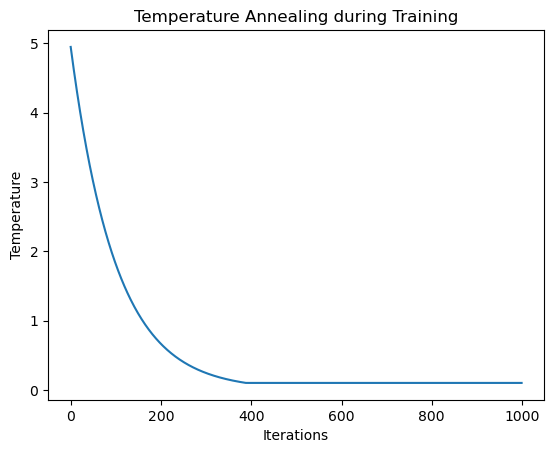

Trained Weights:
[0.0, -1.0270291544031762, -1.1181721072747337, -0.6235726082155728, 0.9422704160181026, 0.1693413985453711]
[0.11699764454690298, 0.0, 0.6063563792455795, 0.846288594457093, -0.05332382474255959, 0.38219128760103604]
[-0.8400171987208798, 0.09003455876591615, 0.0, -1.1824423269286826, 0.15414319034539514, 0.8394364648118862]
[-0.27998118489892465, -1.071963413800484, -0.26040911704488257, 0.0, 0.9160862888375585, -0.2814520978463314]
[0.19956428535521975, -0.5633849232396079, -0.596274405963942, -0.32317352668315524, 0.0, 0.8158254530987998]
[-0.6358845933561401, 0.7118917166302263, 0.08915586791284325, -1.169048634968155, 0.4239089072632414, 0.0]


In [3]:
import random
import math
import matplotlib.pyplot as plt

def initialize_weights(num_visible, num_hidden):
    """
    Initialize weights for a fully connected Boltzmann Machine.
    Weights are randomly initialized within a small range.
    """
    limit = 3.0 / math.sqrt(num_visible + num_hidden)
    weights = [[random.uniform(-limit, limit) for _ in range(num_visible + num_hidden)] for _ in range(num_visible + num_hidden)]
    
    # No self-connections (set diagonal to 0)
    for i in range(num_visible + num_hidden):
        weights[i][i] = 0
        
    return weights

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + math.exp(-x))

def mean_field_update(weights, states, temperature):
    """
    Perform a mean-field update for the states.
    """
    num_units = len(states)
    net_input = [sum(weights[i][j] * states[j] for j in range(num_units)) / temperature for i in range(num_units)]
    return [sigmoid(x) for x in net_input]

def outer_product(a, b):
    """Compute the outer product of two vectors."""
    return [[a[i] * b[j] for j in range(len(b))] for i in range(len(a))]

def deterministic_boltzmann_learning(
    data, num_hidden, learning_rate=0.01, max_iterations=1000, initial_temp=5.0, final_temp=0.1, decay_factor=0.99
):
    """
    Train a Boltzmann network using deterministic Boltzmann learning.
    """
    num_visible = len(data[0])
    num_units = num_visible + num_hidden

    # Initialize weights
    weights = initialize_weights(num_visible, num_hidden)

    # Training loop
    temperature = initial_temp
    temp_history = []
    for iteration in range(max_iterations):
        for sample in data:
            # Initialize states with visible units set to the sample data
            states = [0] * num_units
            for i in range(num_visible):
                states[i] = sample[i]

            # Phase 1: Clamp visible and hidden units
            for _ in range(10):  # Perform mean-field updates
                states = mean_field_update(weights, states, temperature)
            positive_phase = outer_product(states, states)

            # Phase 2: Clamp only visible units
            states = [0] * num_units
            for i in range(num_visible):
                states[i] = sample[i]
            for _ in range(10):
                states = mean_field_update(weights, states, temperature)
            negative_phase = outer_product(states, states)

            # Update weights
            for i in range(num_units):
                for j in range(num_units):
                    weights[i][j] += learning_rate / temperature * (positive_phase[i][j] - negative_phase[i][j])

        # Annealing
        temperature = max(final_temp, temperature * decay_factor)

        # Monitoring progress (optional)
        if iteration % 100 == 0:
            print(f"Iteration {iteration}, Temperature {temperature:.3f}")
        
        temp_history.append(temperature)

    # Plot temperature change over time
    plt.plot(range(max_iterations), temp_history)
    plt.xlabel('Iterations')
    plt.ylabel('Temperature')
    plt.title('Temperature Annealing during Training')
    plt.show()

    return weights

# Example Usage
if __name__ == "__main__":
    # Example binary training data (6 samples, 4 features)
    training_data = [
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [1, 1, 0, 0],
        [0, 0, 1, 1],
        [1, 0, 0, 1],
        [0, 1, 1, 0],
    ]

    num_hidden_units = 2
    trained_weights = deterministic_boltzmann_learning(training_data, num_hidden_units)

    print("Trained Weights:")
    for row in trained_weights:
        print(row)
